In [4]:
import kagglehub
path = kagglehub.dataset_download("dev0914sharma/dataset")

Using Colab cache for faster access to the 'dataset' dataset.


In [5]:
print(path)

/kaggle/input/dataset


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_1 = pd.read_csv("/content/Dataset.csv")

In [9]:
df_1.head(5)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [10]:
df_2 = pd.read_csv("/content/Movie_Id_Titles.csv")

In [11]:
df_2.head(5)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
df_1.shape

(100003, 4)

In [13]:
df_2.shape

(1682, 2)

In [14]:
df_1.isnull().sum()

,0
user_id,0
item_id,0
rating,0
timestamp,0


In [15]:
df_2.isnull().sum()

,0
item_id,0
title,0


In [16]:
df_1.duplicated().sum()

np.int64(0)

In [17]:
df_2.duplicated().sum()

np.int64(0)

In [18]:
df_2.value_counts('item_id')

,count
item_id,
1682,1
1,1
1666,1
1665,1
1664,1
...,...
7,1
6,1
5,1


In [19]:
df_2.value_counts('title')

,count
title,
Chasing Amy (1997),2
"Butcher Boy, The (1998)",2
"Substance of Fire, The (1996)",2
Deceiver (1997),2
Nightwatch (1997),2
...,...
Four Rooms (1995),1
Four Days in September (1997),1
Forrest Gump (1994),1


In [20]:
df_2 = df_2.drop_duplicates(subset = 'title')
df_2

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1676,1677,Sweet Nothing (1995)
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1680,1681,You So Crazy (1994)


In [21]:
print(df_1.columns)
print(df_2.columns)

Index(['user_id', 'item_id', 'rating', 'timestamp'], dtype='object')
Index(['item_id', 'title'], dtype='object')


In [23]:
df = df_1.merge(df_2, on = 'item_id', how = 'inner')
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)
...,...,...,...,...,...
99390,880,476,3,880175444,"First Wives Club, The (1996)"
99391,716,204,5,879795543,Back to the Future (1985)
99392,276,1090,1,874795795,Sliver (1993)
99393,13,225,2,882399156,101 Dalmatians (1996)


In [32]:
rating = df.groupby('title')['rating'].count()
rating

,rating
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41
...,...
Young Guns II (1990),44
"Young Poisoner's Handbook, The (1995)",41
Zeus and Roxanne (1997),6


In [34]:
rating = pd.DataFrame(df.groupby('title')['rating'].count())
rating['number of rating'] = df.groupby('title')['rating'].count()
rating

,rating,number of rating
title,,
'Til There Was You (1997),9,9
1-900 (1994),5,5
101 Dalmatians (1996),109,109
12 Angry Men (1957),125,125
187 (1997),41,41
...,...,...
Young Guns II (1990),44,44
"Young Poisoner's Handbook, The (1995)",41,41
Zeus and Roxanne (1997),6,6


In [25]:
movie_matrix = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
print(movie_matrix['Star Wars (1977)'].mean())

4.359589041095891


In [27]:
df_star_war = movie_matrix['Star Wars (1977)']

In [39]:
## Pearson correlation
corr_star_war = movie_matrix.corrwith(df_star_war)
corr_star_war = pd.DataFrame(corr_star_war, columns = ['correlation'])
corr_star_war =  corr_star_war.reset_index()
corr_star_war = corr_star_war.dropna()
corr_star_war = corr_star_war.sort_values('correlation', ascending = False)
corr_star_war = corr_star_war.merge(rating, on = 'title', how = 'inner')
corr_star_war = corr_star_war[corr_star_war['number of rating'] > 50].sort_values('correlation', ascending = False)
corr_star_war = corr_star_war.head(10)
top10_star_war_rec = corr_star_war[['title','correlation']]
top10_star_war_rec

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,title,correlation
1,Star Wars (1977),1.000000
40,"Empire Strikes Back, The (1980)",0.748353
45,Return of the Jedi (1983),0.672556
65,Raiders of the Lost Ark (1981),0.536117
80,Giant (1956),0.488093
103,"Life Less Ordinary, A (1997)",0.411638
117,Austin Powers: International Man of Mystery (1...,0.377433
120,"Sting, The (1973)",0.367538
130,Indiana Jones and the Last Crusade (1989),0.350107
132,Pinocchio (1940),0.347868


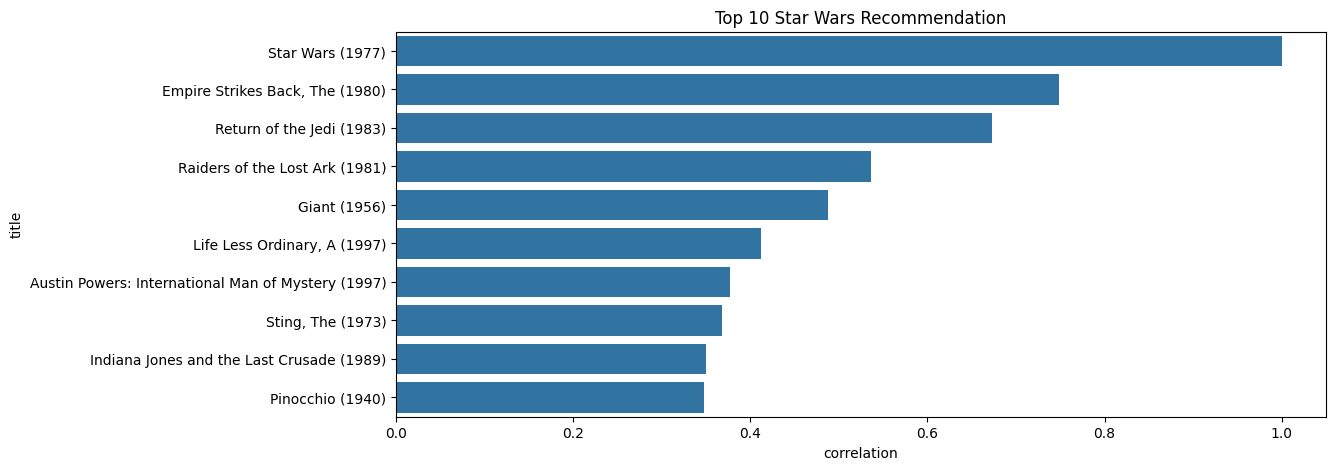

In [40]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'correlation', y = 'title', data = top10_star_war_rec)
plt.title('Top 10 Star Wars Recommendation')
plt.show()